In [1]:
import sys
import os
import json
import pandas
import numpy
import optparse
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from collections import OrderedDict
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
requests_data = pandas.read_csv('Datasets/output_http_csic_2010_full.csv')
requests_data = requests_data.sample(10000)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
requests_data

,index,method,url,protocol,userAgent,pragma,cacheControl,accept,acceptEncoding,acceptCharset,acceptLanguage,host,connection,contentLength,contentType,cookie,payload,label
41022,10036,GET,http://localhost:8080/tienda1/publico/registro...,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=10C7CEA0CB4B9A861A02EBE70E20EF56,password=ro%F1IcA,anom
165079,20543,GET,http://localhost:8080/tienda1/miembros/editar.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=C14137288524C1B2F17547E45CE4BE64,direccion=Pl.+Andres+De+Soloaga+120+8%3FE,norm
159748,18135,GET,http://localhost:8080/tienda1/miembros/editar.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=A070C190990CE8AC3FD47D9F91EC61A0,ciudad=Sobradillo,norm
88474,19739,POST,http://localhost:8080/tienda1/miembros/editar.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,235.0,application/x-www-form-urlencoded,JSESSIONID=FAD1F80C6C144EC236AEC2F5398F6B33,ntc=0317961350004584,anom
42566,10423,GET,http://localhost:8080/tienda1/miembros/editar.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=E7FB363F5E638248E56FE3E805357093,nombre=Nadra,anom
8579,2097,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=03A7E8C663220EB8BBEFB9D12AF159FC,B1=A%F1adir+al+carrito,anom
213815,34141,POST,http://localhost:8080/tienda1/publico/registro...,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,248.0,application/x-www-form-urlencoded,JSESSIONID=E2ED6C41664B2EF433CAA8C7F6C55FAE,login=abdul-sa,norm
40982,10022,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=BAE1A13A70DFF01DEDACACBBFFDB4199,precio=85,anom
91139,20200,POST,http://localhost:8080/tienda1/publico/registro...,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,279.0,application/x-www-form-urlencoded,JSESSIONID=ABC88C5BD47292FBD9BF6DE6ACC3A6B7,login=torrin,anom
171790,23577,GET,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,close,NaN,NaN,JSESSIONID=9E16160CE00AD69AE41CC6EE171EA42E,id=3,norm


In [5]:
col = ['payload', 'label']
requests_data = requests_data[col]
requests_data = requests_data[pandas.notnull(requests_data['payload'])]
requests_data

,payload,label
41022,password=ro%F1IcA,anom
165079,direccion=Pl.+Andres+De+Soloaga+120+8%3FE,norm
159748,ciudad=Sobradillo,norm
88474,ntc=0317961350004584,anom
42566,nombre=Nadra,anom
8579,B1=A%F1adir+al+carrito,anom
213815,login=abdul-sa,norm
40982,precio=85,anom
91139,login=torrin,anom
171790,id=3,norm


In [6]:
requests_data['label_id'] = requests_data['label'].factorize()[0]

from io import StringIO
label_id_df = requests_data[['payload', 'label_id']].drop_duplicates().sort_values('label_id')
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id', 'payload']].values)

In [7]:
requests_data

,payload,label,label_id
41022,password=ro%F1IcA,anom,0
165079,direccion=Pl.+Andres+De+Soloaga+120+8%3FE,norm,1
159748,ciudad=Sobradillo,norm,1
88474,ntc=0317961350004584,anom,0
42566,nombre=Nadra,anom,0
8579,B1=A%F1adir+al+carrito,anom,0
213815,login=abdul-sa,norm,1
40982,precio=85,anom,0
91139,login=torrin,anom,0
171790,id=3,norm,1


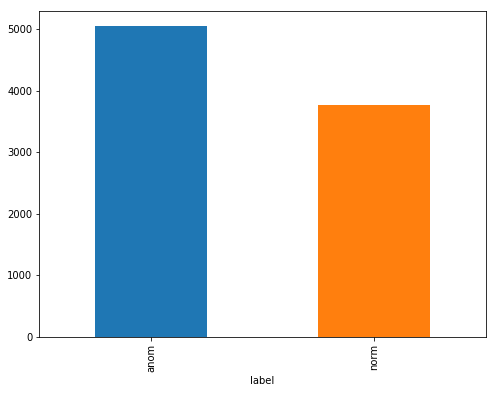

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
requests_data.groupby('label').payload.count().plot.bar(ylim=0)
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(requests_data.payload).toarray()
labels = requests_data.label_id
features.shape

(8820, 2533)

In [11]:
#from sklearn.feature_selection import chi2
#import numpy as np

#N = 2
#for payload, label_id in sorted(label_to_id.items()):
#  features_chi2 = chi2(features, labels == label_id)
#  indices = np.argsort(features_chi2[0])
#  feature_names = np.array(tfidf.get_feature_names())[indices]
#  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#  print("# '{}':".format(label_id))
#  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
#  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(requests_data['payload'], requests_data['label_id'], test_size=0.25, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [19]:
pred = clf.predict(count_vect.transform(X_test))

In [20]:
# Evaluate the prediction accuracy of the model
from sklearn import metrics

print("The Explained Variance: %.2f" % clf.score(count_vect.transform(X_test), y_test))  
print("The Mean Absolute Error: " % metrics.mean_absolute_error(y_test, pred))  
print("The Median Absolute Error: " % metrics.median_absolute_error(y_test, pred)) 
print("The Mean Squared Error: " % metrics.mean_squared_error(y_test, pred)) 
print("The Root Mean Squared Error: " % (numpy.sqrt(metrics.mean_squared_error(y_test, pred))))

The Explained Variance: 0.61
The Mean Absolute Error: 
The Median Absolute Error: 
The Mean Squared Error: 
The Root Mean Squared Error: 


In [15]:
print(clf.predict(count_vect.transform(["B2=Test123&BLA='dasdas'&TEST"])))

[1]


In [22]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train_tfidf, y_train)

# predict the response
pred2 = knn.predict(count_vect.transform(X_test))

In [24]:
print("The Explained Variance: %.2f" % knn.score(count_vect.transform(X_test), y_test))  
print("The Mean Absolute Error: " % metrics.mean_absolute_error(y_test, pred2))  
print("The Median Absolute Error: " % metrics.median_absolute_error(y_test, pred2)) 
print("The Mean Squared Error: " % metrics.mean_squared_error(y_test, pred2)) 
print("The Root Mean Squared Error: " % (numpy.sqrt(metrics.mean_squared_error(y_test, pred2))))

The Explained Variance: 0.60
The Mean Absolute Error: 
The Median Absolute Error: 
The Mean Squared Error: 
The Root Mean Squared Error: 
